# AML-1403-Final-Term-Project

### Group Name- Core Four

Just like former "Core Four" of  the New York Yankees baseball team who are key contributors to the Yankees' in late-1990s dynasty that won four World Series championships in five years. 

#### Team Members: Siva Pavan Kumar Pothireddy (C0790652), Arshdeep Singh (C0793752), Urvashi Patel (C0787478), Herat Shah (C0784334)

### ANN model (MLP and Keras Neural Network Sequential) and Statistical Model on Titanic Dataset

In [1]:
# Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import preprocessing
import seaborn as sea
import itertools
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score 
import keras
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import confusion_matrix
import warnings 
warnings.filterwarnings('ignore')

In [2]:
# Loading Data
df=pd.read_csv('titanic.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
#data exploration
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# To know statical data
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
# To get detailed information about what are there the column names, null count, and data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
# Total no. of male and female
df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

<AxesSubplot:ylabel='Sex'>

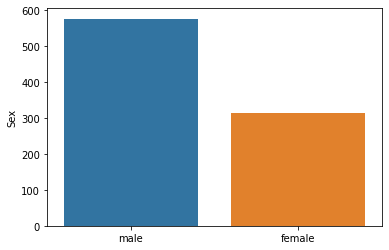

In [7]:
# Using seaborn bar plot between male and female
sea.barplot(df['Sex'].unique(),df['Sex'].value_counts())

In [8]:
# To know count of Passenger Class
df['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

<AxesSubplot:ylabel='Pclass'>

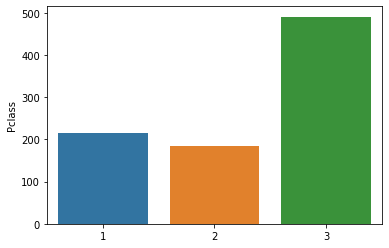

In [9]:
# Bar plot for passengerClass
sea.barplot(df['Pclass'].unique(),df['Pclass'].value_counts())

In [10]:
# Survived people count
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

<AxesSubplot:ylabel='Survived'>

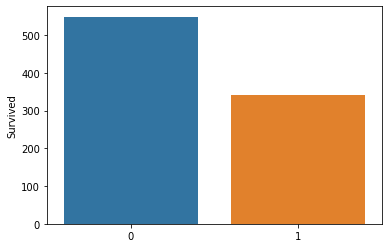

In [11]:
# Bar plot for Survived People
sea.barplot(df['Survived'].unique(),df['Survived'].value_counts())

In [12]:
young=df[df.Age < 30]

In [13]:
young.dropna()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.700,G6,S
23,24,1,1,"Sloper, Mr. William Thompson",male,28.0,0,0,113788,35.500,A6,S
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.000,C23 C25 C27,S
66,67,1,2,"Nye, Mrs. (Elizabeth Ramell)",female,29.0,0,0,C.A. 29395,10.500,F33,S
75,76,0,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.650,F G73,S
...,...,...,...,...,...,...,...,...,...,...,...,...
802,803,1,1,"Carter, Master. William Thornton II",male,11.0,1,2,113760,120.000,B96 B98,S
823,824,1,3,"Moor, Mrs. (Beila)",female,27.0,0,1,392096,12.475,E121,S
853,854,1,1,"Lines, Miss. Mary Conover",female,16.0,0,1,PC 17592,39.400,D28,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.000,B42,S


In [14]:
# total 156 people age less then 30year survived
young.shape

(384, 12)

In [15]:
young_survived= young[young['Survived']==1]

In [16]:
young_survived['Survived'].count().sum()

156

In [17]:
# total 228 young people age less then 30year were died
young1=df[df.Age < 30]

In [18]:
young_died= young1[young1['Survived']==0]

In [19]:
young_died['Survived'].count().sum()

228

In [20]:
# total 134 people age more then 30year survived
old=df[df.Age >= 30]

In [21]:
old_survived= old[old['Survived']==1]

In [22]:
old_survived['Survived'].count().sum()

134

In [23]:
# total 196 people age more then 30year survived
old=df[df.Age >= 30]

In [24]:
old_died= old[old['Survived']==0]

In [25]:
old_died['Survived'].count().sum()

196

#### There were total 384 young people age less then 30 year were there on ship
##### Only 156 out of them survived

#### There were total 330 old people age more then 30 year were there on ship
##### Only 134 out of them survived

In [26]:
# column 0 is Pclass, 1 is Sex , 2  age
X = df.iloc[:, [2, 4,5]].values
X=pd.DataFrame(X)
y = df.iloc[:, 1].values

In [27]:
# Assigning Columns Names
X.columns=['pclass','sex','age']
X

,pclass,sex,age
0,3,male,22
1,1,female,38
2,3,female,26
3,1,female,35
4,3,male,35
...,...,...,...
886,2,male,27
887,1,female,19
888,3,female,NaN
889,1,male,26


<AxesSubplot:xlabel='age', ylabel='Frequency'>

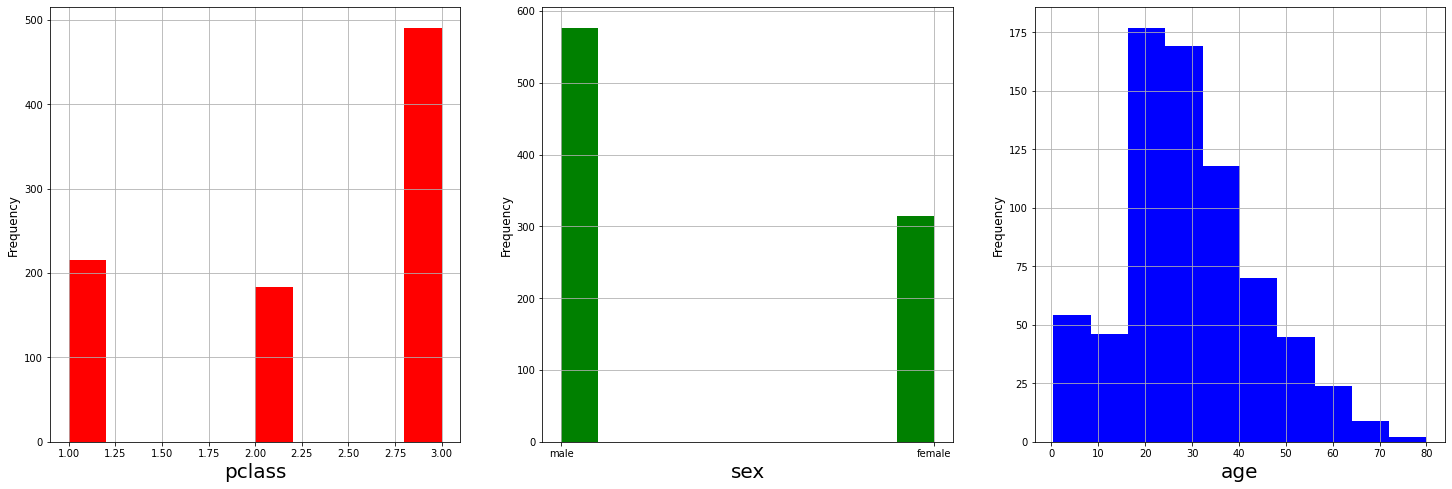

In [28]:
# Histogram for selected features
fig, axes = plt.subplots(1,3,figsize=(25,8))
# Setting x-label and y-label
axes[0].set_xlabel("pclass",size=20)
axes[1].set_xlabel("sex",size=20)
axes[2].set_xlabel("age",size=20)
axes[0].set_ylabel("Frequency",size=12)
axes[1].set_ylabel("Frequency",size=12)
axes[2].set_ylabel("Frequency",size=12)
# Selected columns
X['pclass'].hist(bins=10, ax=axes[0],color='r')
X['sex'].hist(bins=10, ax=axes[1],color='g')
X['age'].hist(bins=10, ax=axes[2],color='b')

In [29]:
# To know data types
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   pclass  891 non-null    object
 1   sex     891 non-null    object
 2   age     714 non-null    object
dtypes: object(3)
memory usage: 21.0+ KB


In [30]:
# To know if there are any special chracters in the dataset
X.isin(['?']).sum(axis=0)

pclass    0
sex       0
age       0
dtype: int64

In [31]:
# Replacing '?' with NaN values
X.replace('?',np.nan,inplace=True)

In [32]:
# Checking if there are any null values in the dataset
X.isnull().sum()

pclass      0
sex         0
age       177
dtype: int64

In [33]:
# To know any missing values in data
X.isnull().values.any()

True

In [34]:
# Replacing null values
X.replace(np.nan,inplace=True)

pclass    None
sex       None
age       None
dtype: object

In [35]:
# Checking after the replacing null values
X.isnull().values.any()

False

In [36]:
# To know the shape of the dataset
X.shape

(891, 3)

In [37]:
# Data after processing and selecting columns
print(X)

     pclass     sex   age
0         3    male  22.0
1         1  female  38.0
2         3  female  26.0
3         1  female  35.0
4         3    male  35.0
..      ...     ...   ...
886       2    male  27.0
887       1  female  19.0
888       3  female  19.0
889       1    male  26.0
890       3    male  32.0

[891 rows x 3 columns]


In [38]:
# label encoding for changing categorical values to numerical values
le = preprocessing.LabelEncoder()
X[['pclass', 'sex', 'age']]=X[['pclass', 'sex', 'age']].apply(le.fit_transform)
X.columns

Index(['pclass', 'sex', 'age'], dtype='object')

### Splitting the processed data into train and test data

In [39]:
# Splitting the data into train and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.7)# size of training data will 70%

#### Stadardizing the processed dataset

In [40]:
# Stadardizing the dataset
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [41]:
print(X_train,X_test)

[[ 0.81897905  0.74665923 -0.65336381]
 [ 0.81897905 -1.33929906 -2.02075715]
 [-0.37592481 -1.33929906  1.86263995]
 ...
 [ 0.81897905  0.74665923  1.86263995]
 [ 0.81897905 -1.33929906 -1.80197422]
 [ 0.81897905  0.74665923 -0.3251894 ]] [[-1.57082867  0.74665923  0.93281247]
 [ 0.81897905  0.74665923 -0.05171073]
 [-1.57082867 -1.33929906  0.4952466 ]
 [ 0.81897905  0.74665923 -0.81745101]
 [-1.57082867 -1.33929906  0.98750821]
 [-1.57082867  0.74665923  1.80794421]
 [-1.57082867  0.74665923  1.47976981]
 [-0.37592481  0.74665923  0.4952466 ]
 [ 0.81897905  0.74665923  0.4952466 ]
 [ 0.81897905 -1.33929906 -0.43458087]
 [ 0.81897905  0.74665923 -0.3251894 ]
 [ 0.81897905 -1.33929906  0.002985  ]
 [-0.37592481  0.74665923 -0.87214674]
 [ 0.81897905  0.74665923 -0.27049367]
 [ 0.81897905  0.74665923 -0.54397234]
 [ 0.81897905  0.74665923  1.75324848]
 [ 0.81897905  0.74665923  1.04220394]
 [-1.57082867  0.74665923  1.42507408]
 [ 0.81897905  0.74665923 -0.65336381]
 [ 0.81897905  0.74

#### Statistical models to perform binary classification

In [42]:
#Logistic Regression
clf = LogisticRegression()
clf.fit(X_train, y_train)
y_pred_log_reg = clf.predict(X_test)
acc_log_reg = round( clf.score(X_train, y_train) * 100, 2)
print (str(acc_log_reg) + ' percent')

79.61 percent


In [43]:
# Support Vector Machine (SVM)
clf = SVC()
clf.fit(X_train, y_train)
y_pred_svc = clf.predict(X_test)
acc_svc = round(clf.score(X_train, y_train) * 100, 2)
print (acc_svc)

81.7


In [44]:
# Linear SVM
clf = LinearSVC()
clf.fit(X_train, y_train)
y_pred_linear_svc = clf.predict(X_test)
acc_linear_svc = round(clf.score(X_train, y_train) * 100, 2)
print (acc_linear_svc)

79.29


In [45]:
# k -Nearest Neighbors
clf = KNeighborsClassifier(n_neighbors = 3)
clf.fit(X_train, y_train)
y_pred_knn = clf.predict(X_test)
acc_knn = round(clf.score(X_train, y_train) * 100, 2)
print (acc_knn)

86.52


In [46]:
# Decision Tree
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
y_pred_decision_tree = clf.predict(X_test)
acc_decision_tree = round(clf.score(X_train, y_train) * 100, 2)
print (acc_decision_tree)

89.25


In [47]:
# Random Forest
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train, y_train)
y_pred_random_forest = clf.predict(X_test)
acc_random_forest = round(clf.score(X_train, y_train) * 100, 2)
print (acc_random_forest)

89.25


In [48]:
# Gaussian Naive Bayes
clf = GaussianNB()
clf.fit(X_train, y_train)
y_pred_gnb = clf.predict(X_test)
acc_gnb = round(clf.score(X_train, y_train) * 100, 2)
print (acc_gnb)

79.94


In [49]:
sea.set() # setting seaborn default for plots

Accuracy: 89 % 

Confusion Matrix in Numbers
[[355  28]
 [ 39 201]]

Confusion Matrix in Percentage
[[0.93 0.07]
 [0.16 0.84]]



<AxesSubplot:>

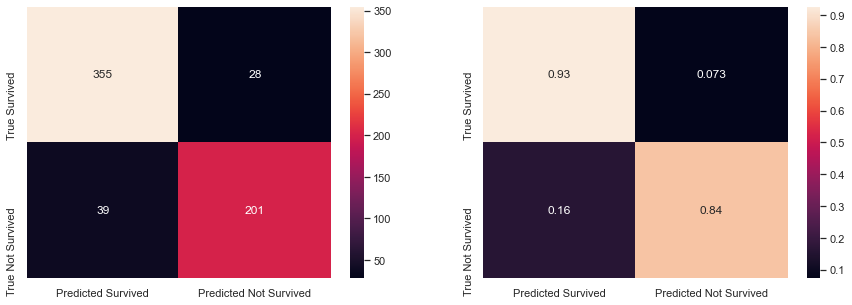

In [50]:
# Confusion Matrix
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train, y_train)
y_pred_random_forest_training_set = clf.predict(X_train)
acc_random_forest = round(clf.score(X_train, y_train) * 100, 2)
print ("Accuracy: %i %% \n"%acc_random_forest)

class_names = ['Survived', 'Not Survived']

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_train, y_pred_random_forest_training_set)
np.set_printoptions(precision=2)

print ('Confusion Matrix in Numbers')
print (cnf_matrix)
print ('')

cnf_matrix_percent = cnf_matrix.astype('float') / cnf_matrix.sum(axis=1)[:, np.newaxis]

print ('Confusion Matrix in Percentage')
print (cnf_matrix_percent)
print ('')

true_class_names = ['True Survived', 'True Not Survived']
predicted_class_names = ['Predicted Survived', 'Predicted Not Survived']

df_cnf_matrix = pd.DataFrame(cnf_matrix, 
                             index = true_class_names,
                             columns = predicted_class_names)

df_cnf_matrix_percent = pd.DataFrame(cnf_matrix_percent, 
                                     index = true_class_names,
                                     columns = predicted_class_names)

plt.figure(figsize = (15,5))

plt.subplot(121)
sea.heatmap(df_cnf_matrix, annot=True, fmt='d')

plt.subplot(122)
sea.heatmap(df_cnf_matrix_percent, annot=True)


In [51]:
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'Support Vector Machines', 'Linear SVC', 
              'KNN', 'Decision Tree', 'Random Forest', 'Naive Bayes', 
              ],
    
    'Score': [acc_log_reg, acc_svc, acc_linear_svc, 
              acc_knn,  acc_decision_tree, acc_random_forest, acc_gnb, 
              ]
    })

models.sort_values(by='Score', ascending=False)

,Model,Score
4,Decision Tree,89.25
5,Random Forest,89.25
3,KNN,86.52
1,Support Vector Machines,81.70
6,Naive Bayes,79.94
0,Logistic Regression,79.61
2,Linear SVC,79.29


#### So by analyzing all the models we can say that the score for Decision tree and Random forest classifier is the best as compared to KNN, native Byes, Logistic Regression, Linear SVC, Support Vector.

### Applying MLP Classifier

#### Hidden Layers Sizes (number of neurons), selected neurons is 10
#### Activation function for hidden layers is rectified linear unit function (relu)
#### Batchs is Size of minibatches for random opotimizers
#### Max Iter is maximum number of iterations, selected iteration is 300

In [52]:
# classifier model with hidden layer size of 10 and relu activation 
classifier_1 = MLPClassifier(hidden_layer_sizes=(10, ),random_state=1, activation='relu',max_iter=300).fit(X_train, y_train)

In [53]:
# Predict using the multi-layer perceptron classifier
y_pred=classifier_1.predict(X_test)

In [54]:
# To know predict score
predict=classifier_1.score(X_test, y_test)
print("Predict Score",predict)

Predict Score 0.7611940298507462


In [55]:
# Classification report for the processed data
print ("Classification Report :\n ", classification_report(y_test, y_pred))

Classification Report :
                precision    recall  f1-score   support

           0       0.78      0.86      0.82       166
           1       0.73      0.60      0.66       102

    accuracy                           0.76       268
   macro avg       0.75      0.73      0.74       268
weighted avg       0.76      0.76      0.76       268



# The below Keras code is commented, after running the model uncomment the code, if Keras and Tensorflow is installed in your machine. Thank You :)

### Applying Keras Neural Network Sequential

#### Sequential model from Keras
#### Activation is relu
#### Unit is Hidden Unit Vector
#### Kernal Initializer is Statistical Distribution for initialising the weights
#### Input Dimensions of the features
#### Activation is sigmoid for last layer of neuron and produces given outputs
#### Each Epoch is when a dataset is passed forward and backward through the neural network only once since it takes more time

In [56]:
# Initializing the ANN model
classifier_2 = Sequential()

In [57]:
# Adding the input layer and the first hidden layer
classifier_2.add(Dense(units=6, activation='relu', kernel_initializer='uniform', input_dim = 3))

In [58]:
# Adding the second hidden layer
classifier_2.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu'))

In [59]:
# Adding the output layer
classifier_2.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

In [60]:
# Compiling the ANN model with Binary Crossentropy
classifier_2.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [61]:
# Fitting the ANN model with batch size of 10 and epochs of 100
classifier_2.fit(X_train, y_train, batch_size = 10, epochs = 100)

Epoch 1/100
63/63 [==============================] - 0s 1ms/step - loss: 0.6898 - accuracy: 0.6180
Epoch 2/100
63/63 [==============================] - 0s 1ms/step - loss: 0.6756 - accuracy: 0.6148
Epoch 3/100
63/63 [==============================] - 0s 2ms/step - loss: 0.6378 - accuracy: 0.6597
Epoch 4/100
63/63 [==============================] - 0s 1ms/step - loss: 0.5818 - accuracy: 0.7929
Epoch 5/100
63/63 [==============================] - 0s 1ms/step - loss: 0.5284 - accuracy: 0.8010
Epoch 6/100
63/63 [==============================] - 0s 2ms/step - loss: 0.4922 - accuracy: 0.8010
Epoch 7/100
63/63 [==============================] - 0s 2ms/step - loss: 0.4686 - accuracy: 0.8058
Epoch 8/100
63/63 [==============================] - 0s 2ms/step - loss: 0.4547 - accuracy: 0.7961
Epoch 9/100
63/63 [==============================] - 0s 1ms/step - loss: 0.4461 - accuracy: 0.7929
Epoch 10/100
63/63 [==============================] - 0s 1ms/step - loss: 0.4414 - accuracy: 0.7897
Epoch 11/

63/63 [==============================] - 0s 1ms/step - loss: 0.4271 - accuracy: 0.7865
Epoch 84/100
63/63 [==============================] - 0s 1ms/step - loss: 0.4274 - accuracy: 0.7865
Epoch 85/100
63/63 [==============================] - 0s 1ms/step - loss: 0.4272 - accuracy: 0.7881
Epoch 86/100
63/63 [==============================] - 0s 1ms/step - loss: 0.4264 - accuracy: 0.7865
Epoch 87/100
63/63 [==============================] - 0s 2ms/step - loss: 0.4268 - accuracy: 0.7865
Epoch 88/100
63/63 [==============================] - 0s 1ms/step - loss: 0.4277 - accuracy: 0.7913
Epoch 89/100
63/63 [==============================] - 0s 1ms/step - loss: 0.4266 - accuracy: 0.7897
Epoch 90/100
63/63 [==============================] - 0s 1ms/step - loss: 0.4270 - accuracy: 0.7881
Epoch 91/100
63/63 [==============================] - 0s 1ms/step - loss: 0.4267 - accuracy: 0.7881
Epoch 92/100
63/63 [==============================] - 0s 1ms/step - loss: 0.4269 - accuracy: 0.7849
Epoch 93/100


In [62]:
# To predict the X_test
y_pred = classifier_2.predict(X_test)
y_pred= (y_pred > 0.5)

In [63]:
# To know the model Accuracy
print ("Accuracy : ", accuracy_score(y_test, y_pred))

Accuracy :  0.7649253731343284


In [64]:
# Printing the Classification Report for the dataset
print ("Classification Report :\n ", classification_report(y_test, y_pred))

Classification Report :
                precision    recall  f1-score   support

           0       0.80      0.83      0.81       166
           1       0.71      0.66      0.68       102

    accuracy                           0.76       268
   macro avg       0.75      0.74      0.75       268
weighted avg       0.76      0.76      0.76       268

